# [2] Medical Image Preprocessing
* [Dataset : ACRIN-FLT-Breast](https://wiki.cancerimagingarchive.net/pages/viewpage.action?pageId=30671268)



(1) DICOM 파일 읽기

(2) CT 영상 및 주요 환자 정보 불러오기

(3) CT 영상 시각화

(4) 영상 전처리
* Resizing
* Augmentation (Flip, Rotation)

(5) RT structure 파일이란?
* RS 파일 읽기
* Contour 정보 추출하기

(6) 전처리된 데이터 확인하기

In [4]:
!pip install pydicom

     |████████████████████████████████| 35.5MB 119kB/s 


In [5]:
import numpy as np
import pydicom as dcm
import matplotlib.pyplot as plt
from glob import glob

%matplotlib inline

In [6]:
from google.colab import drive
import os
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AHEx-1D4HzJY_qlwNXMC92IdYFFwjwl8ojH5tEZ2RiWlELY3yPVWHg
Mounted at /content/drive


In [7]:
cd 'drive/My Drive/Medical_AI_Tutorials/'

/content/drive/My Drive/Medical_AI_Tutorials


In [8]:
ls

01_GoogleDriveMount_GitClone.ipynb  04_Medical_AI_Tutorial.ipynb  README.md
02_DICOM_handling.ipynb             data/
03_PyTorch_Basic.ipynb              LICENSE


### (1) DICOM 파일 읽기

In [9]:
sample_CT = dcm.dcmread('data/DCM_ACRIN-FLT-Breast_001/1-068.dcm')
#sample_CT

### (2) CT 영상 및 주요 환자 정보 불러오기

In [10]:
img = sample_CT.pixel_array
img, np.min(img), np.max(img)

(array([[-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        ...,
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000]], dtype=int16),
 -2000,
 2464)

In [11]:
pat_name   = sample_CT.PatientName
pat_sex       = sample_CT.PatientSex
pat_age      = sample_CT.PatientAge
pat_weight = sample_CT.PatientWeight

pat_name, pat_sex, pat_age, pat_weight

('ACRIN-FLT-Breast_001', 'F', '046Y', "82.0")

### (3) CT 영상 시각화

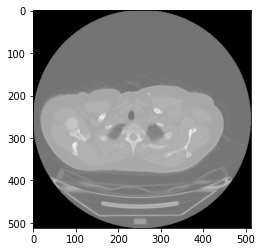

In [12]:
plt.imshow(img, 'gray')

In [13]:
dcm_list = sorted(glob('data/DCM_ACRIN-FLT-Breast_001/1*.dcm'))
dcm_list[:5]

['data/DCM_ACRIN-FLT-Breast_001/1-067.dcm',
 'data/DCM_ACRIN-FLT-Breast_001/1-068.dcm',
 'data/DCM_ACRIN-FLT-Breast_001/1-069.dcm',
 'data/DCM_ACRIN-FLT-Breast_001/1-070.dcm',
 'data/DCM_ACRIN-FLT-Breast_001/1-071.dcm']

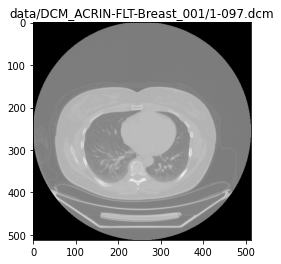

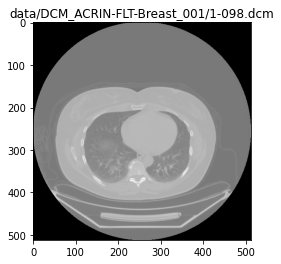

In [14]:
for _dcm in dcm_list[30:32]:
  img = dcm.dcmread(_dcm).pixel_array

  plt.figure()  
  plt.title(_dcm)
  plt.imshow(img, 'gray')

### (4) 영상 전처리


In [15]:
from scipy.ndimage import gaussian_filter, zoom, rotate, map_coordinates
from scipy.interpolate import CubicSpline
import random

In [21]:
def plot(imgs):
    plt.figure(figsize=(10,10))
    n = len(imgs)
    
    for i, k in enumerate(imgs):    
        ax = plt.subplot(1, n, i+1)
        im = plt.imshow(k, 'gray')
    plt.show()

* Resizing



In [17]:
img.shape

(512, 512)

In [18]:
img_re = zoom(img, 256/512)
img_re.shape

(256, 256)

In [19]:
img_re2 = zoom(img, (128/512, 256/512))
img_re2.shape

(128, 256)

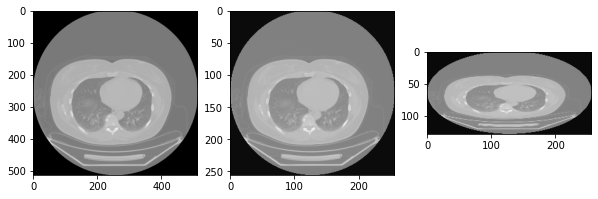

In [22]:
plot([img, img_re, img_re2])

* Augmentation (Flip)

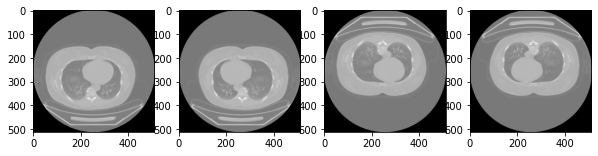

In [23]:
plot([img, img[:, ::-1], img[::-1, :], img[::-1, ::-1]])

In [24]:
def random_flip(img):
  rn = random.randint(0, 3)

  if rn == 0:
    return img
  elif rn == 1:
    return img[:, ::-1]
  elif rn == 2:
    return img[::-1, :]
  elif rn == 3:
    return img[::-1, ::-1]

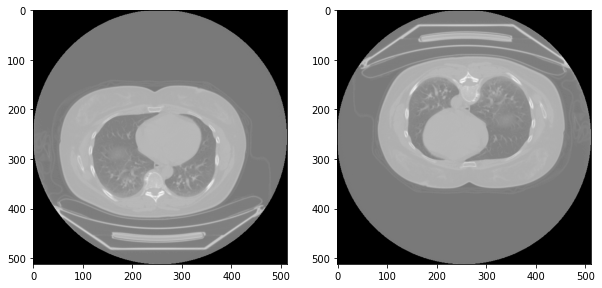

In [25]:
plot([img, random_flip(img)])

* Augmentation (Rotation)

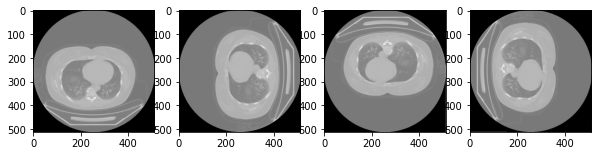

In [26]:
plot([img, rotate(img, 90), rotate(img, 180), rotate(img, 270)])

In [27]:
def random_rotate(img):
  rn = random.randint(0, 3)

  if rn == 0:
    return img
  elif rn == 1:
    return rotate(img, 90)
  elif rn == 2:
    return rotate(img, 180)
  elif rn == 3:
    return rotate(img, 270)

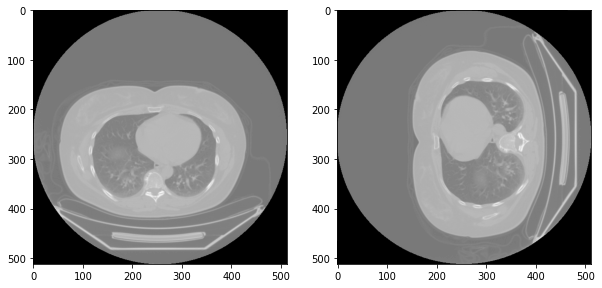

In [30]:
plot([img, random_rotate(img)])

### (5) RT structure 파일이란?
![RT structure](https://aapm.onlinelibrary.wiley.com/cms/asset/f1570f95-41ed-4c05-952e-4c7a70dbf540/mp14107-fig-0001-m.jpg)
* [[Figure 출처] CT images with expert manual contours of thoracic cancer for benchmarking auto-segmentation accuracy (Yang et al., 2020)](https://aapm.onlinelibrary.wiley.com/cms/asset/f1570f95-41ed-4c05-952e-4c7a70dbf540/mp14107-fig-0001-m.jpg)

* [Open Dataset (Lung CT Segmentation Challenge 2017)](https://wiki.cancerimagingarchive.net/display/Public/Lung+CT+Segmentation+Challenge+2017)


In [31]:
RS = dcm.dcmread('data/DCM_ACRIN-FLT-Breast_001/RS.ACRIN-FLT-Breast_001.CT_1.dcm')
#RS

* RS 파일 읽기

In [32]:
contour_list = []
for it in range(0, len(RS.StructureSetROISequence)):
  contour_list.append(RS.StructureSetROISequence[it].ROIName)

contour_list

['BODY', 'RT LUNG', 'LT LUNG', 'HEART', 'CTV']

* Contour 정보 추출하기

In [33]:
CT_path = 'data/DCM_ACRIN-FLT-Breast_001/1-088.dcm'

CT_dcm = dcm.dcmread(CT_path)

CT_img = CT_dcm.pixel_array
CT_UID = CT_dcm.SOPInstanceUID

CT_img.shape, CT_UID

((512, 512),
 '1.3.6.1.4.1.14519.5.2.1.7009.2401.233943024695980390253246117393')

In [34]:
matching_contours = []

CP_LL = RS.ROIContourSequence[2].ContourSequence

for idx_CP, CP in enumerate(CP_LL):
  UID = CP.ContourImageSequence[0].ReferencedSOPInstanceUID

  if UID == CT_UID:
    matching_contours.append(idx_CP) 

matching_contours

[23, 24]

In [35]:
from PIL import Image, ImageDraw

def make_polygon(CP_S, slice_number, ref_coor, pixel_resol):
    coor = np.array(CP_S[slice_number].ContourData)
    coor = coor.reshape(-1, 3) # obtain coordinates for binary mask

    bm_coor = coor - ref_coor  # change mask coordinates into coordinates in real image
    bm_coor = bm_coor[:, :2]
    bm_coor = np.round(bm_coor/pixel_resol).astype(int)

    img = Image.new('L', (512, 512))
    draw = ImageDraw.Draw(img)
    points = []
    for i in range(0,len(bm_coor)): points.append(tuple(bm_coor[i]))
    points=tuple(points)
    draw.polygon((points), fill=1)
    img=np.array(img)
    return img

def ct2mask(dcm_fname, CP_S, slices):
    ref = dcm.read_file(dcm_fname)
    ref_coor = ref.ImagePositionPatient
    pixel_resol = float(ref.PixelSpacing[0])
    white_pixels = np.array([])
    imgs = np.array([])

    for it in slices:
        img = make_polygon(CP_S, it, ref_coor, pixel_resol)
        white_pixels = np.append(white_pixels, np.sum(img == 1))
        if imgs.size == 0:
            imgs = img
        else:
            imgs = np.append(imgs, img).reshape(-1, 512, 512)

        idx = np.argsort(-white_pixels)
        imgs = imgs.reshape(-1, 512, 512)
        new_imgs = imgs[idx]
        new_img = np.zeros((512, 512))
        for it in range(0, len(idx)):
            if np.max(new_img + new_imgs[it]) == 1:
                new_img += new_imgs[it]
            else:
                new_img -= new_imgs[it]

        if len(idx) > 2: # Which implies abnormal contour
            new_img = ndimage.median_filter(new_img, size = 4)
        
    return new_img

def binary(mask, th):
    mask[mask >= th] = 1
    mask[mask < th]  = 0
    
    return mask

In [36]:
mask = ct2mask(CT_path, CP_LL, matching_contours)
mask = binary(mask, 0.5)

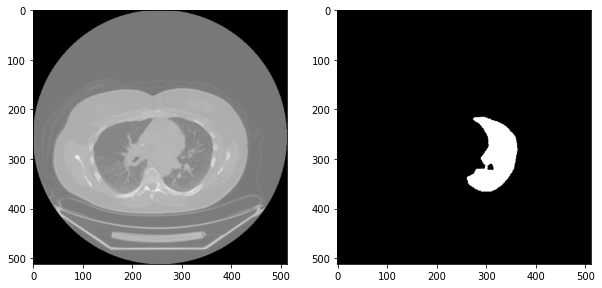

In [37]:
plot([CT_img, mask])

### (6) 전처리된 데이터 확인하기

(512, 1024)


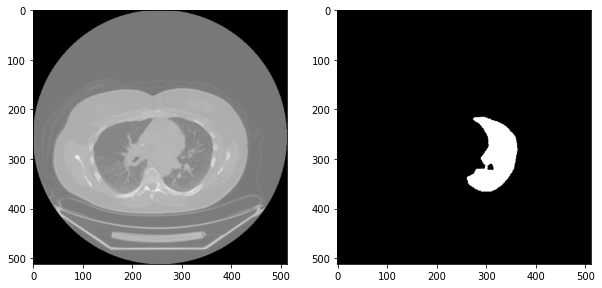

In [38]:
sample_npy = np.load('data/Trainset/ACRIN-FLT-Breast_001/1-088.ll.npy')

print(sample_npy.shape)
plot([sample_npy[:, :512], sample_npy[:, 512:]])